# Gaussian Kernel Smoothing Processing

This note is to describe how to process Gaussian Kernel smoothing on an image.
The image source is from 

In [6]:
url = 'http://www.ece.rice.edu/~wakin/images/lena512.bmp'

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
import requests
from io import BytesIO
%matplotlib notebook

<IPython.core.display.Javascript object>


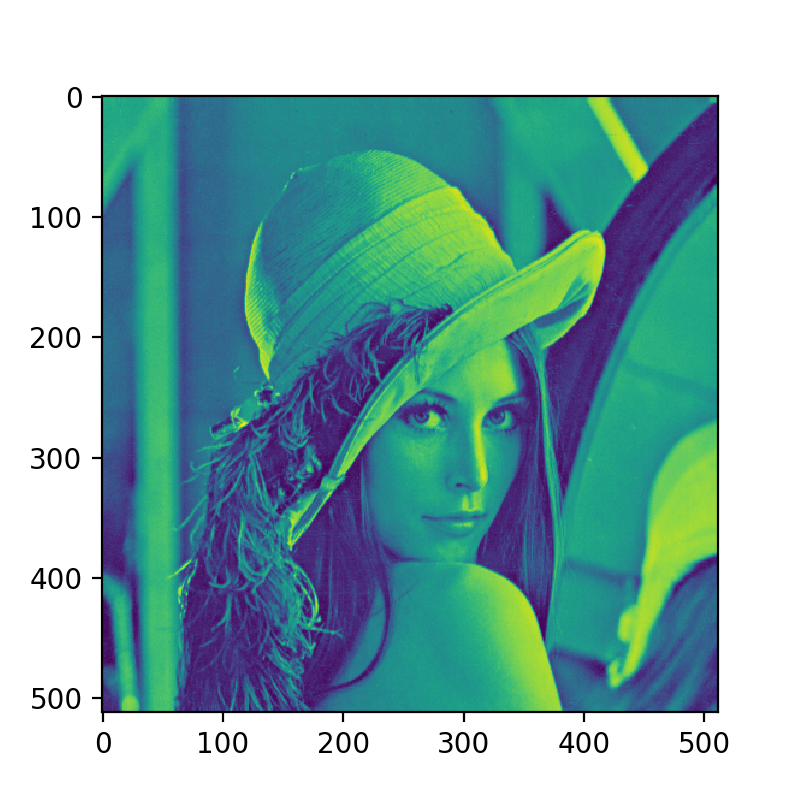

In [17]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()

## Image size

In [26]:
np.array(img).shape

(512, 512)

## Convolution

To perform convlution with a Gaussian function, we need to prepare a bigger matrix, whose size needs to be integer times of the array. For example, 1024 or 1536 etc.

<IPython.core.display.Javascript object>


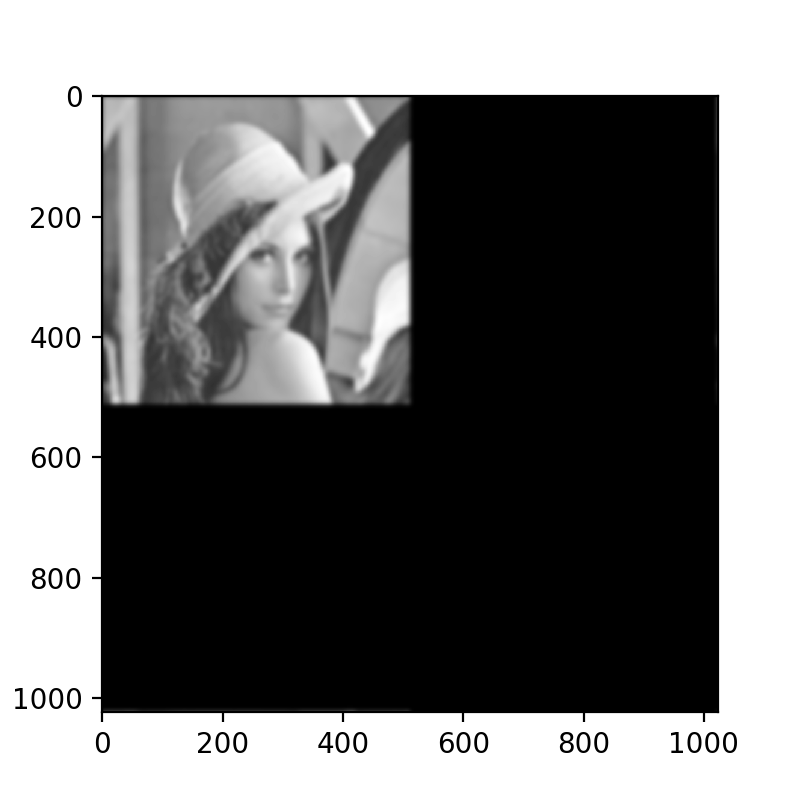

In [27]:
f = np.array(img)
fpad = np.zeros((1024, 1024), dtype="float32")
fpad[:512,:512] = f
x = np.concatenate((np.arange(512), np.arange(-512,0)))
[xx,yy] = np.meshgrid(x, x)
h = np.asarray(np.exp(-0.5*(xx*xx+yy*yy)/(4.0*4.0)), dtype="float32")
H = np.fft.rfft2(h)
F = np.fft.rfft2(fpad)
G  = F*H
g = np.fft.irfft2(G)
plt.figure(figsize=(4,4))
plt.imshow(g, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


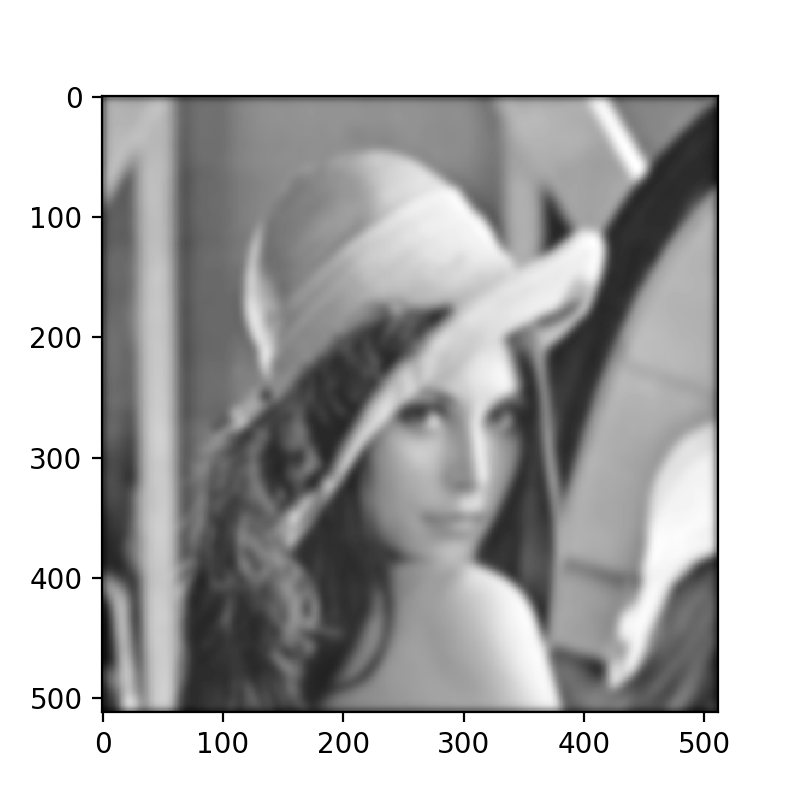

In [28]:
plt.figure(figsize=(4,4))
plt.imshow(g[:512, :512], cmap='gray')
plt.show()